Mackenzie Butler, 11-26-24,Analysis Plan
I got this survey Data from Marjolein Yvonne Schippers' Masters Thesis: "Live Music Concert Attendees 
Motivation, Satisfaction & Loyalyt  where she did a survey of 140 about concert attendanc. https://thesis.eur.nl/pub/32748/Schippers-Marjolein.pdf  

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [18]:
cas = pd.read_csv('Concert_Demo.csv')
cas2 = pd.read_csv('Concert_Motives.csv')
cas3 = pd.read_csv('Concert_Factors.csv')
cas4 = pd.read_csv('Concert_Expierence.csv')

cas.head()

,Column1,Sex,Age,Travel Time,Attendance Frequency,visit BIRD,Know BIRD
0,1,57.0,4.0,52.0,24.0,96,46.0
1,2,83.0,40.0,48.0,27.0,51,76.0
2,3,NaN,45.0,27.0,70.0,65,10.0
3,4,NaN,23.0,13.0,14.0,50,16.0
4,5,NaN,28.0,NaN,5.0,55,7.0


The table above is data complied from a survey of 140 participants. This one was asking about their motives for going to concerts as well as some preliminary demographics. For the Sex column, 1 = male and 2 = female. 

For age:  < 20 (1), 20-25 (2), 26-35 (3), 36-45 (4) , 46-59 (5), 60+ (6)

For time traveled:  Less than 15 minutes (1), 15-30 minutes (2), Up to 1 hour (3), More than 1 hour (4)

For attendance frequency: Less than Once a Year (1), Once a Year (2), 2-4 Times a Year (3), Once a Month (4), 2-3 Times a Month (5), More than 3 times a Month (6)

For visit BIRD, which is why they visit and they were allowed to pick more than 1 box, (BIRD being the venue visited):
Specific show (1), Variety of shows (2), Location (3), Reputation of BIRD (4), Small venue (5), Friendly staff(6), Value for money (7), Good access facilities (8), Other (9)

For know BIRD, which is how they heard about BIRD and where allowed to pick more than 1 box:
Website (1), Social media (2), Adds newspaper (3), Poster (4), Flyer (5), Friends/family (6), Other (7)

 ther (9)h (6) 4)  (6) 

In [19]:
cas2.head()

,Column1,Emotional,Knowledge,Escape,Another World,Socialize,Distinguish,Entertained,Original Expierence,Physical Skill,Physical Attractiveness,Physical Proximity,Uninhibited Behavior,Relive Past,Overall Satisfaction,Recommend,Return
0,1,4.0,11.0,8.0,4.0,4.0,64.0,1.0,3.0,10.0,73.0,35.0,54.0,37.0,0,1,1
1,2,10.0,30.0,10.0,12.0,21.0,18.0,2.0,11.0,13.0,21.0,31.0,25.0,29.0,0,0,1
2,3,27.0,58.0,35.0,34.0,24.0,42.0,5.0,33.0,32.0,26.0,43.0,41.0,41.0,0,1,0
3,4,67.0,38.0,66.0,67.0,68.0,12.0,45.0,65.0,67.0,15.0,28.0,25.0,26.0,0,0,1
4,5,32.0,3.0,21.0,23.0,23.0,3.0,87.0,28.0,18.0,3.0,3.0,4.0,6.0,1,1,5


The table above was a survey about what the peoples motives for going to concerts on a scale of 1-5, 1 being a low motive and 5 being a high motive. they could only choose on number for each question

In [20]:
cas3.head()

,Column1,Ticket Buying F,Venue Appearance F,Availablility Parking F,Accessibility Parking F,Wardrobe F,Sound Quality F,Lighnting F,Friendliness Staff F,Bar Service F
0,1,1,1,60,3,14,1,2,2,2
1,2,12,4,12,16,15,1,10,2,2
2,3,23,17,25,38,48,3,18,17,22
3,4,72,72,29,63,52,40,82,64,63
4,5,32,46,12,20,13,95,28,55,51


The survey above was asking what people beeived were important factors about a venue when attending a concert, with 1 being least important and 5 being most important. They could only pick one number per question. I put the Fs in the naming to stand for factor to differenciate which data set I am pulling from

In [21]:
cas4.head()

,Column1,Easy Ticket Buying,Venue Appearance,Availablility Parking,Accessibility Parking,Wardrobe,Sound Quality,Lightning,Friendliness Staff,Bar Service
0,1,35,44,13,24,10,15,14,33,22
1,2,81,76,50,89,51,91,79,69,75
2,3,23,17,62,26,56,27,36,26,28
3,4,1,3,14,1,21,7,11,11,11
4,5,0,0,1,0,2,0,0,1,4


The table above was asking about thier expierence at the venue this survey was originated from, BIRD. It was asking thier thoughts, 1 being poor and 5 being exellent. Each participant could only choose one number per question.

There are a lot of things that I want to compare and analyze

in no particular order things like travel time and location of BIRD. If they were enertained and how often they come back. I could compare every factor they say is important when attending a concert to how they ranked the same factors to the venue BIRD. The age and relive past. whether they are there to see a specific show or just socialize.

Below is comparing The Travel time and location. blue is travel timad and orange is location. With location I tried to only graph only the poeple that answered 3 in the visit BIRD category.

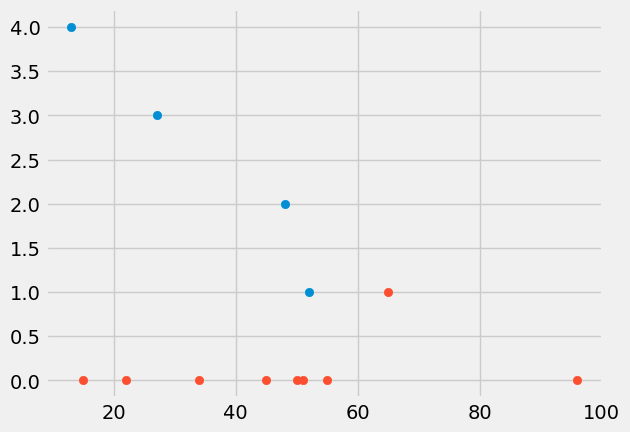

In [22]:
fig1, ax1 = plt.subplots()
ax1.scatter(cas['Travel Time'], cas['Column1'], label = 'Travel Time')
ax1.scatter(cas['visit BIRD'], cas['Column1']==3, label = 'Location')
plt.style.use('fivethirtyeight')
plt.show()

this is a plot showing how entertained people were (blue) and comparing to if they wouold return (Orange)

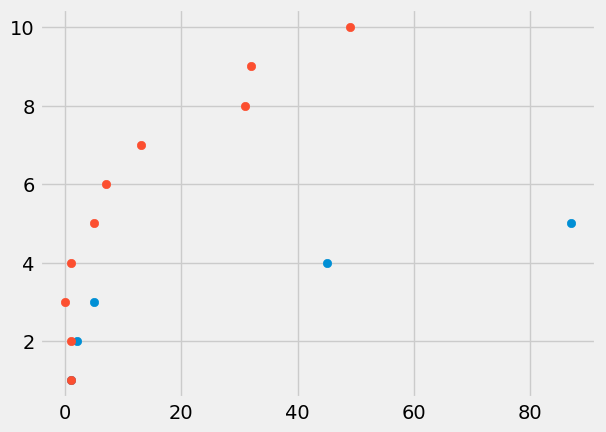

In [23]:
fig2, ax2 = plt.subplots()
ax2.scatter(cas2['Entertained'], cas2['Column1'], label = 'Entertained')
ax2.scatter(cas2['Return'], cas2['Column1'], label = 'Return')
plt.show()

Below is a graph to comapare how old poeple are (Blue) and how much their motivation to Relive the past is (Orange)

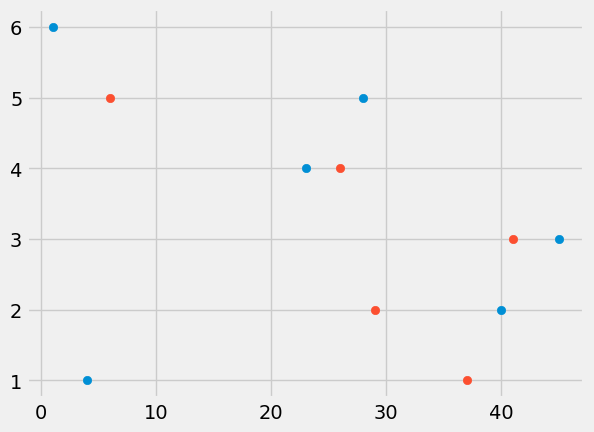

In [25]:
fig3, ax3 = plt.subplots()
ax3.scatter(cas['Age'], cas['Column1'], label = 'Age')
ax3.scatter(cas2['Relive Past'], cas2['Column1'], label = 'Return')
plt.show()

Below is comparing how many poeple visit bird for a specific show(Blue) or to socialize(Orange)

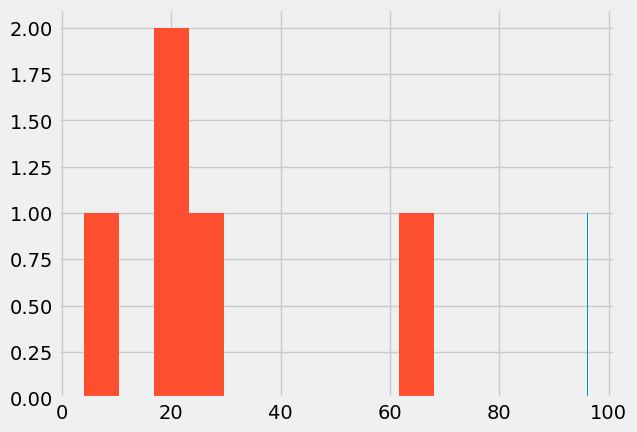

In [37]:
fig4, ax4 = plt.subplots()
ax4.hist(cas['visit BIRD'].iloc[0], label = ('Specific Show'))
ax4.hist(cas2['Socialize'], label = ('Socialize'))
plt.show()

Same graph but in a scatter plot

ValueError: x and y must be the same size

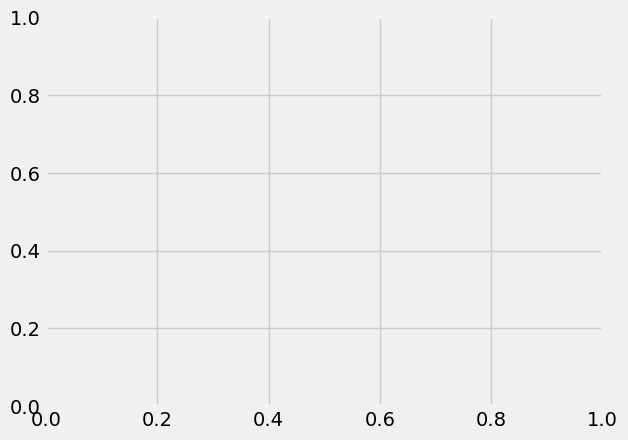

In [42]:
fig5, ax5 = plt.subplots()
ax5.scatter(cas['visit BIRD'].iloc[0],cas['Column1'], label = ('Specific Show'))
ax5.scatter(cas2['Socialize'], cas2['Column1'], label = ('Socialize'))
plt.show()

I understand why it isnt working but I dont know a better way to compare these graphs than just scatter and bar plots

The next ones I am just going to do a couple of the sections that comapre what the participant deemed as important when visiting a venue and their thoughts on BIRD (cas3 and cas4) I will do the rest in the final report

Belowe is whether they though easy ticket buying was important (blue) and how easy they though BIRD's ticket buying was

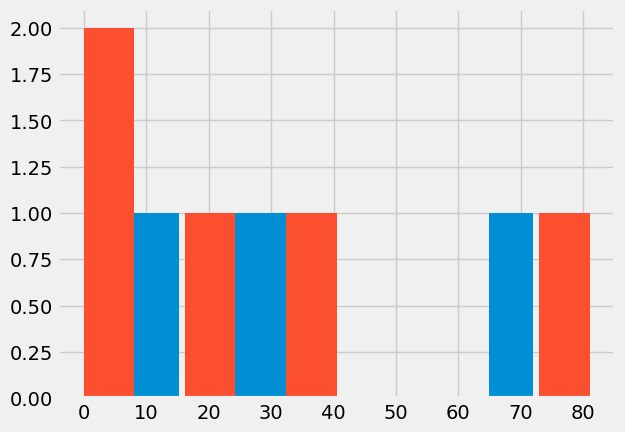

In [44]:
fig6, ax6 = plt.subplots()
ax6.hist(cas3['Ticket Buying F'], label = ('Ticket Buying Factor'))
ax6.hist(cas4['Easy Ticket Buying'], label = ('Ticket Buying Ranked'))
plt.show()

Same comparision but in a scatter plot

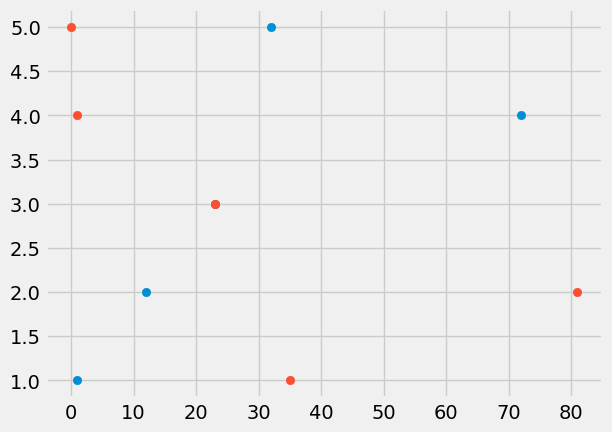

In [48]:
fig7, ax7 = plt.subplots()
ax7.scatter(cas3['Ticket Buying F'], cas3['Column1'],label = ('Ticket Buying Factor'))
ax7.scatter(cas4['Easy Ticket Buying'],cas4['Column1'], label = ('Ticket Buying Ranked'))
plt.show()

The figure below compares how important Venue appearance is (Blue) and how they ranked BIRD's Venue appearance (Orange)

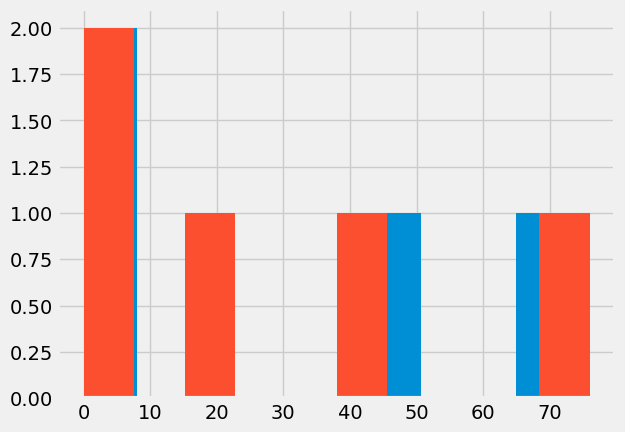

In [49]:
fig8, ax8 = plt.subplots()
ax8.hist(cas3['Venue Appearance F'], label = ('Venue Appearance Factor'))
ax8.hist(cas4['Venue Appearance'], label = ('Venue Appearance Ranked'))
plt.show()

Same comparison but scatter plot

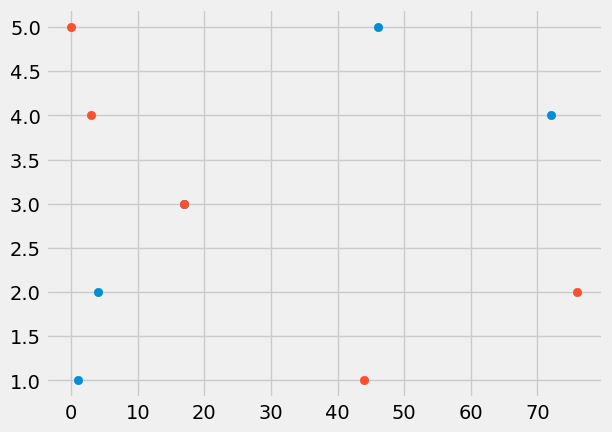

In [51]:
fig9, ax9 = plt.subplots()
ax9.scatter(cas3['Venue Appearance F'], cas3['Column1'],label = ('Venue Appearance Factor'))
ax9.scatter(cas4['Venue Appearance'],cas4['Column1'], label = ('Venue Appearance Ranked'))
plt.show()

Comparing how important people thought Availablility Parking is to a venue (Blue) and how they ranked BIRD's Availablility Parking (Orange)

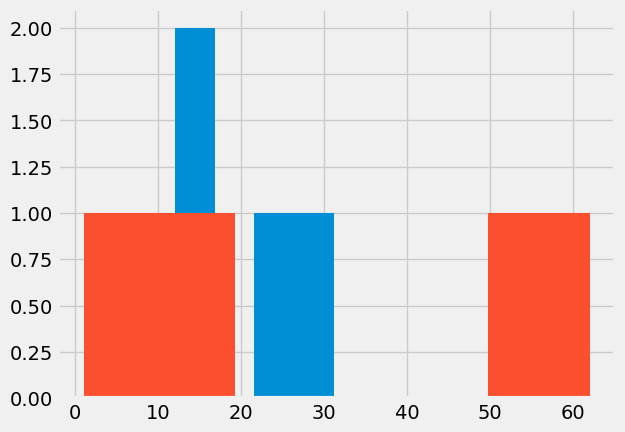

In [53]:
fig10, ax10 = plt.subplots()
ax10.hist(cas3['Availablility Parking F'], label = ('Availability Parking Factor'))
ax10.hist(cas4['Availablility Parking'], label = ('Availability Parking Ranked'))
plt.show()

Same comparison but a scatter plot

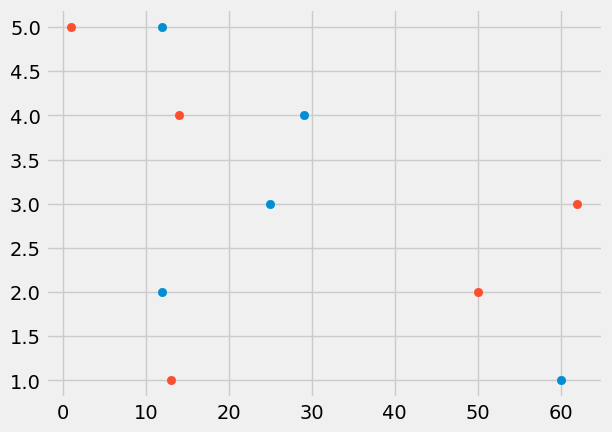

In [54]:
fig11, ax11 = plt.subplots()
ax11.scatter(cas3['Availablility Parking F'], cas3['Column1'],label = ('Availablility Parking Factor'))
ax11.scatter(cas4['Availablility Parking'],cas4['Column1'], label = ('Availablility Parking Ranked'))
plt.show()

This is my analysis plan, I think there are better graphs to compare some of this data but I'm not really sure how to do one that shows the relashonship to eachother. I dont know if just bar graphs and scatter plots are ok.